<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 6 (midnight), 2025 -->


# Project 1 on Machine Learning, deadline October 6 (midnight), 2025

**Data Analysis and Machine Learning FYS-STK3155/FYS4155**, University of Oslo, Norway

Date: **September 2**


### Deliverables

First, join a group in canvas with your group partners. Pick an avaliable group for Project 1 in the "People" page.

In canvas, deliver as a group and include:

- A PDF of your report which follows the guidelines covered below and in the week 39 exercises. Additional requirements include:
  - It should be around 5000 words, use the word counter in Overleaf for this.
  - It should be around 10 pages long, not including references or appendices.
  - It should include around 10-15 figures.
- A comment linking to your github repository (or folder in one of your github repositories) for this project. The repository must include
  - A PDF of the report
  - A folder named Code, where you put python files for your functions and notebooks for reproducing your results. Remember to use a seed for generating random data and for train-test splits when generating final results.
  - A README file with
    - the name of the group members
    - a short description of the project
    - a description of how to install the required packages to run your code from a requirements.txt file
    - names and descriptions of the various notebooks in the Code folder and the results they produce


## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report. The
links at
<https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects>
contain more information. There you can find examples of previous
reports, the projects themselves, how we grade reports etc. How to
write reports will also be discussed during the various lab
sessions. Please do ask us if you are in doubt.

When using codes and material from other sources, you should refer to
these in the bibliography of your report, indicating wherefrom you for
example got the code, whether this is from the lecture notes,
softwares like Scikit-Learn, TensorFlow, PyTorch or other sources. These sources
should always be cited correctly. How to cite some
of the libraries is often indicated from their corresponding GitHub
sites or websites, see for example how to cite Scikit-Learn at
<https://scikit-learn.org/dev/about.html>.

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

If you would like to study other data sets, feel free to propose other
sets. What we have proposed here are mere suggestions from our
side. If you opt for another data set, consider using a set which has
been studied in the scientific literature. This makes it easier for
you to compare and analyze your results. Comparing with existing
results from the scientific literature is also an essential element of
the scientific discussion. The University of California at Irvine
with its Machine Learning repository at
<https://archive.ics.uci.edu/ml/index.php> is an excellent site to
look up for examples and
inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally
interesting site. Feel free to explore these sites. When selecting
other data sets, make sure these are sets used for regression problems
(not classification).


## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including Ordinary Least Squares (OLS) reegression, Ridge regression and LASSO regression.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

We will study how to fit polynomials to specific
one-dimensional functions (feel free to replace the suggested function with more complicated ones).

We will use Runge's function (see <https://en.wikipedia.org/wiki/Runge%27s_phenomenon> for a discussion). The one-dimensional function we will study is


$$
f(x) = \frac{1}{1+25x^2}.
$$


Our first step will be to perform an OLS regression analysis of this
function, trying out a polynomial fit with an $x$ dependence of the
form $[x,x^2,\dots]$. You can use a uniform distribution to set up the
arrays of values for $x \in [-1,1]$, or alternatively use a fixed step size.
Thereafter we will repeat many of the same steps when using the Ridge and Lasso regression methods,
introducing thereby a dependence on the hyperparameter (penalty) $\lambda$.

We will also include bootstrap as a resampling technique in order to
study the so-called **bias-variance tradeoff**. After that we will
include the so-called cross-validation technique.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
# The function used to generate data, the Runge function
def Runge_func(x):
    return 1.0/(1 + 25*x**2)

### Part a : Ordinary Least Square (OLS) for the Runge function

We will generate our own dataset for abovementioned function
$\mathrm{Runge}(x)$ function with $x\in [-1,1]$. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

_Write your own code_ (using for example the pseudoinverse function **pinv** from **Numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ up to order $15$ or higher. Explore the dependence on the number of data points and the polynomial degree.

Evaluate the mean Squared error (MSE)


$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$


and the $R^2$ score function. If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as


$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$


where we have defined the mean value of $\boldsymbol{y}$ as


$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$


Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree 15).
Plot also the parameters $\theta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For the scaling you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it). This function is called
$train\_test\_split$. **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually also an additional
validation set). There
is no explicit recipe for how much data should be included as training
data and say test data. An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.


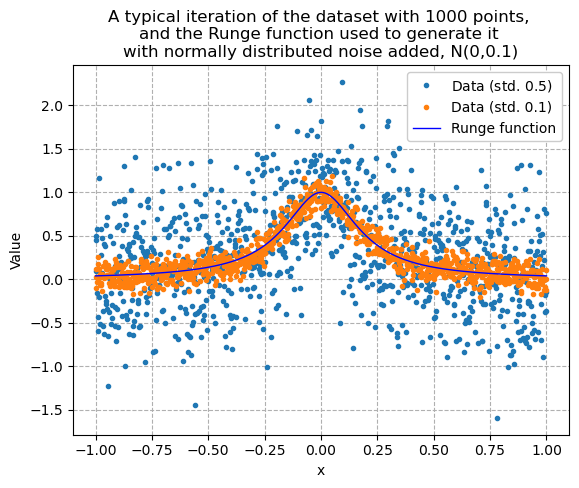

In [157]:
# Setting up dataset
np.random.seed(2025)
n = 1000
std_data = 0.1
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, std_data, size=n)

plt.plot(x, Runge_func(x) + np.random.normal(0, 0.5, size=n), '.', label=r"Data (std. $0.5$)")
plt.plot(x,y, ".", label=f"Data (std. {std_data})")
plt.plot(x, Runge_func(x), "b-", label="Runge function", linewidth="1.0")
plt.title(f"A typical iteration of the dataset with {n} points, \n" 
           "and the Runge function used to generate it \n"
          f"with normally distributed noise added, N(0,{std_data})"
          )
plt.xlabel("x")
plt.ylabel("Value")
plt.legend().get_frame().set_alpha(1.0) # Add solid background (non see thru) to legend box
plt.grid(True, which="both", linestyle="--", linewidth=0.8)
plt.show()
plt.close()

In [4]:
# Functions used

def polynomial_features(x, p, intercept=False):
    """
    Take an array of x values, and the desired polynomial degree p.
    Create a feature (design) matrix with first column x**1, second column with x**2, and so on. I.e. the i-th column containing x**(i+1).
    Intercept=True will turn the first column into ones, meaning the i-th column will contain the value x**(j).
    """
    n = len(x)
    x = x.ravel()
    if intercept  == True:
        X = np.zeros((int(n), int(p + 1)))
        for i in range(0, int(p+1)):
            X[:, i] = x**i  # Create first column with only ones (since x**0 = 1), the intercept column
    else:
        X = np.zeros((int(n), int(p)))
        for i in range(0, int(p)):
            X[:, i] = x**(i+1)
    return X

def OLS_parameters(X, y):
    """
    The closed form solution of least square optimization.
    Take a feature matrix X, and a column vector y.
    Return the parameters of OLS fit.
    """
    # The inverse of matrix X, using .pinv in case X is not square
    # The beta vector in: X @ beta = y, solved for beta
    beta = np.linalg.pinv(X.T @ X) @ X.T @ y   
    return beta

def Ridge_parameters(X, y, ridge_lambda):
    """
    The closed form solution of Ridge optimization.
    Take a feature matrix X, and a column vector y, and the Ridge lambda parameter.
    Return the beata parameters of the Ridge fit.
    """
    # Assumes X is scaled and has no intercept column
    I = np.identity(np.shape(X)[1])    # Create identity matrix same shape as X.T @ X, columns of X decide the shape, (nxm)(mxn)=(nxn)
    # Element-wise multiplication with *
    beta = np.linalg.pinv(X.T @ X + ridge_lambda*I) @ X.T @ y
    return beta

def grad_C_OLS(XTX, XTy, y, theta, n):
    """ 
    Calculate the gradient of the cost function C for OLS. Original expression: (2.0/n)*(X.T @ X @ theta - X.T @ y).
    Take the matrix multiplication involving features X.T@X, and X.T@y; target vector y; the parameter vector theta; and n data points.
    Usually used in a grad decent/accent loop, therefore having the factors X.T@X and X.T@y precalculated for speed improvement. 
    Return the calculated gradient. 
    """
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    return (2.0/n)*(XTX @ theta - XTy)

def grad_C_Ridge(XTX, XTy, y, theta, n, ridge_lambda):
    """ 
    Calculate the gradient of the cost function C for Ridge. Original expression: (2.0/n)*(X.T @ X @ theta - X.T @ y) + 2*ridge_lambda*theta.
    Take the matrix multiplication involving features X.T@X, and X.T@y; target vector y; the parameter vector theta; n data point; and ridge_lambda. 
    Usually used in a grad decent/accent loop, therefore having X.T@X and X.T@y precalculated for speed improvement. 
    Return the calculated gradient. 
    """
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    return (2.0/n)*(XTX @ theta - XTy) + 2*ridge_lambda*theta

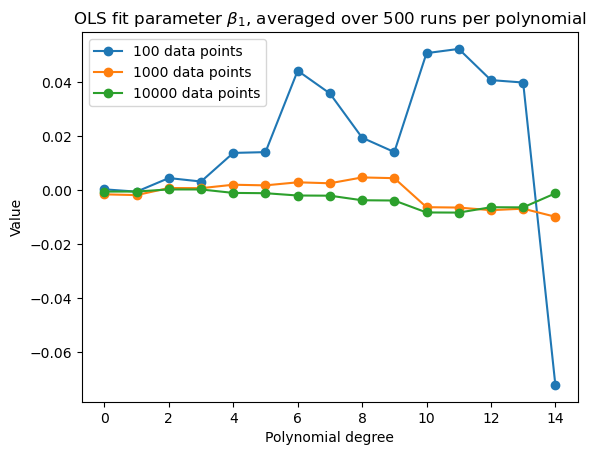

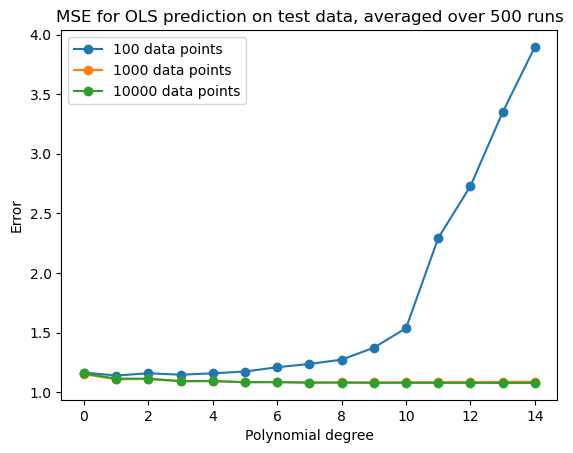

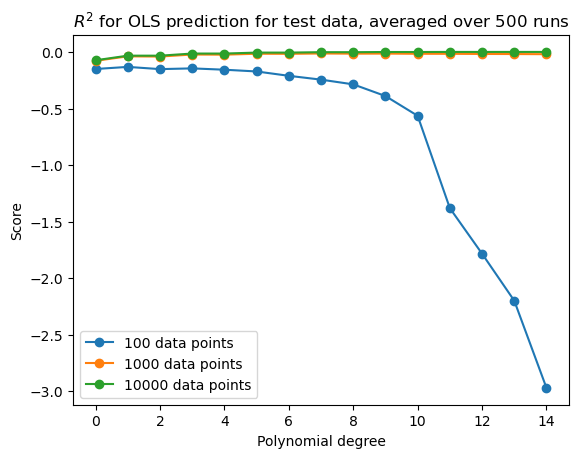

In [5]:
# We split once per sample size to make sure we are comparing model polynomial degree/model complexity, on the same data. Only variable changing is model complexity.
# Could use cross validation as well

# Scaling with standardization, since we are working with ...

np.random.seed(2025)

data_sizes = np.array([100, 1000, 10000])    # note: might need som justification

poly_min = 1
poly_max = 15
poly_degrees = np.arange(poly_min, poly_max + 1, 1)

runs = 500
MSEs_runs_datasize_polys_matrix = np.zeros([runs, len(data_sizes), len(poly_degrees)])
R2s_runs_datasize_polys_matrix = np.zeros([runs, len(data_sizes), len(poly_degrees)])
beta1s_runs_datasize_polys_matrix = np.zeros([runs, len(data_sizes), len(poly_degrees)])

for i in range(runs):

    for j in range(len(data_sizes)):
        n_j = data_sizes[j]
        x = np.linspace(-1, 1, n_j)
        y = Runge_func(x) + np.random.normal(0, 1, size=n_j)
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        for k in range(len(poly_degrees)):
            X_train_poly = polynomial_features(x_train, poly_degrees[k], intercept=True)
            X_test_poly = polynomial_features(x_test, poly_degrees[k], intercept=True)

            # Scaling of the data
            scaler = StandardScaler()   # initialize scaler method
            scaler.fit(X_train_poly)    # only base the scaling on X_train, to prevent data leakage from X_test 
            X_train_s = scaler.transform(X_train_poly)
            X_test_s = scaler.transform(X_test_poly)
            #y_offset = np.mean(y_train)    # Not nesecarry to add this to the y prediction since we have use intercept parameter             

            # Train model/find beta parameters
            beta_poly = OLS_parameters(X_train_s, y_train)
            # Doing the prediction
            predict_y_test_poly = X_test_s @ beta_poly

            # MSE for target y_test and prediction
            MSEs_runs_datasize_polys_matrix[i,j,k] = mean_squared_error(y_test, predict_y_test_poly)
            R2s_runs_datasize_polys_matrix[i,j,k] = 1.0 - (np.sum((y_test - predict_y_test_poly)**2)/(np.sum((y_test - np.mean(y_test))**2))) #R2
            beta1s_runs_datasize_polys_matrix[i,j,k] = beta_poly[1]

# Average over all runs
mean_MSE_datasize_poly = np.mean(MSEs_runs_datasize_polys_matrix, axis=0)
mean_R2_runs_datasize_polys_matrix = np.mean(R2s_runs_datasize_polys_matrix, axis=0)
mean_beta1s_runs_datasize_polys_matrix = np.mean(beta1s_runs_datasize_polys_matrix, axis=0)

# Plot mean beta1 parameter of OLS fit on test data for various data sizes and polynomials; averaged over many runs
plt.plot(mean_beta1s_runs_datasize_polys_matrix[0,:], "o-", label=f"{data_sizes[0]} data points")
plt.plot(mean_beta1s_runs_datasize_polys_matrix[1,:], "o-", label=f"{data_sizes[1]} data points")
plt.plot(mean_beta1s_runs_datasize_polys_matrix[2,:], "o-", label=f"{data_sizes[2]} data points")
plt.xlabel("Polynomial degree")
plt.ylabel("Value")
plt.title(fr"OLS fit parameter $\beta_1$, averaged over {runs} runs per polynomial")
plt.legend()
plt.show()
plt.close()

# Plot MSE for OLS prediction on test data for various sizes of data, and polynomials; averaged over many runs
plt.plot(mean_MSE_datasize_poly[0,:], "o-", label=f"{data_sizes[0]} data points")
plt.plot(mean_MSE_datasize_poly[1,:], "o-", label=f"{data_sizes[1]} data points")
plt.plot(mean_MSE_datasize_poly[2,:], "o-", label=f"{data_sizes[2]} data points")
plt.title(f"MSE for OLS prediction on test data, averaged over {runs} runs")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend()
#plt.grid()
plt.show()
plt.close()

# Plot R^2 for OLS prediction on test data for various sizes of data, and polynomials; averaged over many runs
plt.plot(mean_R2_runs_datasize_polys_matrix[0,:], "o-", label=f"{data_sizes[0]} data points")
plt.plot(mean_R2_runs_datasize_polys_matrix[1,:], "o-", label=f"{data_sizes[1]} data points")
plt.plot(mean_R2_runs_datasize_polys_matrix[2,:], "o-", label=f"{data_sizes[2]} data points")
plt.title(rf"$R^{2}$ for OLS prediction for test data, averaged over {runs} runs")
plt.xlabel("Polynomial degree")
plt.ylabel("Score")
plt.legend()
#plt.grid()
plt.show()
plt.close()

### Part b: Adding Ridge regression for the Runge function

Write your own code for the Ridge method as done in the previous
exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the results from the exercise set from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the OLS method. Study the
dependence on $\lambda$.


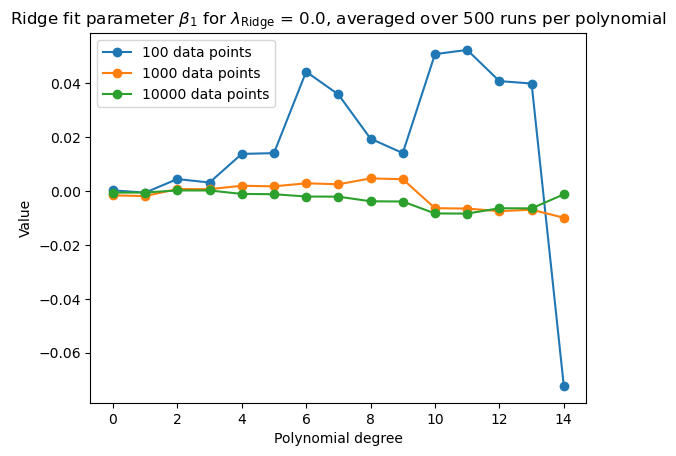

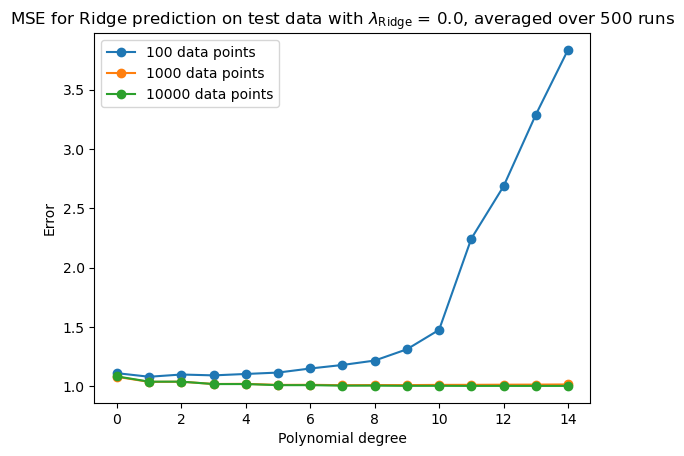

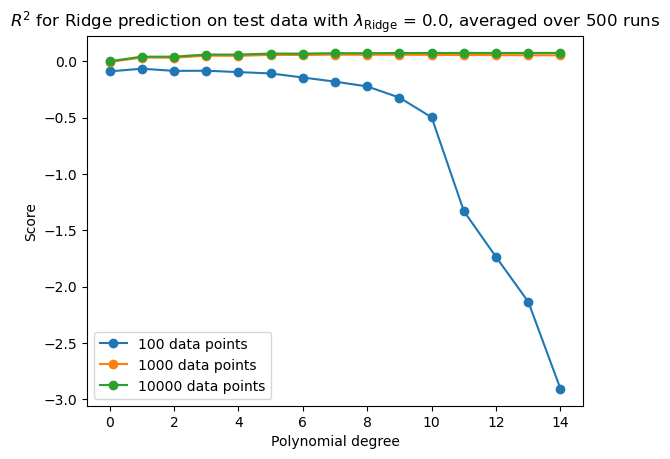

In [6]:
# We split once per sample size to make sure we are comparing model polynomial degree/model complexity, on the same data. Only variable changing is model complexity.
# Could use cross validation as well

# Scaling with standardization, since we are working with ...

np.random.seed(2025)

data_sizes = np.array([100, 1000, 10000])    # note: might need som justification

poly_min = 1
poly_max = 15
poly_degrees = np.arange(poly_min, poly_max + 1, 1)

runs = 500
MSEs_runs_datasize_polys_matrix = np.zeros([runs, len(data_sizes), len(poly_degrees)])
R2s_runs_datasize_polys_matrix = np.zeros([runs, len(data_sizes), len(poly_degrees)])
beta0s_runs_datasize_polys_matrix = np.zeros([runs, len(data_sizes), len(poly_degrees)])

for i in range(runs):

    for j in range(len(data_sizes)):
        n_j = data_sizes[j]
        x = np.linspace(-1, 1, n_j)
        y = Runge_func(x) + np.random.normal(0, 1, size=n_j)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        for k in range(len(poly_degrees)):
            X_train_poly = polynomial_features(x_train, poly_degrees[k], intercept=False)
            X_test_poly = polynomial_features(x_test, poly_degrees[k], intercept=False)

            # Scaling of the data
            scaler = StandardScaler()   # initialize scaler method
            scaler.fit(X_train_poly)    # only base the scaling on X_train, to prevent data leakage from X_test 
            X_train_s = scaler.transform(X_train_poly)
            X_test_s = scaler.transform(X_test_poly)
            y_offset = np.mean(y_train) # Nesecarry to add this to the y prediction since we have not used intercept parameter             

            # Train model/find beta parameters
            ridge_lambda = 0.0
            beta_poly = Ridge_parameters(X_train_s, y_train, ridge_lambda=ridge_lambda)
            # Doing the prediction
            predict_y_test_poly = X_test_s @ beta_poly + y_offset

            # MSE for target y_test and prediction
            MSEs_runs_datasize_polys_matrix[i,j,k] = mean_squared_error(y_test, predict_y_test_poly)
            R2s_runs_datasize_polys_matrix[i,j,k] = 1.0 - (np.sum((y_test - predict_y_test_poly)**2)/(np.sum((y_test - np.mean(y_test))**2))) #R2
            beta0s_runs_datasize_polys_matrix[i,j,k] = beta_poly[0]

# Average over all runs
mean_MSE_datasize_poly = np.mean(MSEs_runs_datasize_polys_matrix, axis=0)
mean_R2_runs_datasize_polys_matrix = np.mean(R2s_runs_datasize_polys_matrix, axis=0)
mean_beta0s_runs_datasize_polys_matrix = np.mean(beta0s_runs_datasize_polys_matrix, axis=0)

# Plot mean beta1 parameter of OLS fit on test data for various data sizes and polynomials; averaged over many runs
plt.plot(mean_beta0s_runs_datasize_polys_matrix[0,:], "o-", label=f"{data_sizes[0]} data points")
plt.plot(mean_beta0s_runs_datasize_polys_matrix[1,:], "o-", label=f"{data_sizes[1]} data points")
plt.plot(mean_beta0s_runs_datasize_polys_matrix[2,:], "o-", label=f"{data_sizes[2]} data points")
plt.xlabel("Polynomial degree")
plt.ylabel("Value")
plt.title(fr"Ridge fit parameter $\beta_1$ for $\lambda_\mathrm{{Ridge}}$ = {ridge_lambda}, averaged over {runs} runs per polynomial")
plt.legend()
plt.show()
plt.close()

# Plot MSE for OLS prediction on test data for various sizes of data, and polynomials; averaged over many runs
plt.plot(mean_MSE_datasize_poly[0,:], "o-", label=f"{data_sizes[0]} data points")
plt.plot(mean_MSE_datasize_poly[1,:], "o-", label=f"{data_sizes[1]} data points")
plt.plot(mean_MSE_datasize_poly[2,:], "o-", label=f"{data_sizes[2]} data points")
plt.title(fr"MSE for Ridge prediction on test data with $\lambda_\mathrm{{Ridge}}$ = {ridge_lambda}, averaged over {runs} runs")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend()
#plt.grid()
plt.show()
plt.close()

# Plot R^2 for OLS prediction on test data for various sizes of data, and polynomials; averaged over many runs
plt.plot(mean_R2_runs_datasize_polys_matrix[0,:], "o-", label=f"{data_sizes[0]} data points")
plt.plot(mean_R2_runs_datasize_polys_matrix[1,:], "o-", label=f"{data_sizes[1]} data points")
plt.plot(mean_R2_runs_datasize_polys_matrix[2,:], "o-", label=f"{data_sizes[2]} data points")
plt.title(fr"$R^{2}$ for Ridge prediction on test data with $\lambda_\mathrm{{Ridge}}$ = {ridge_lambda}, averaged over {runs} runs")
plt.xlabel("Polynomial degree")
plt.ylabel("Score")
plt.legend()
#plt.grid()
plt.show()
plt.close()

Similar to OLS for $\lambda$ = 0, with scaling.

In [7]:
# MSE for Ridge regression for different polynomials and lambda_ridges values.
np.random.seed(2025)

# Number of data points
n = 1000

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 0.5, size=n)

poly_min = 1
poly_max = 15
poly_degrees = np.arange(poly_min, poly_max + 1, 1)

exp_start = 6
exp_stop = -6
n_ridge_lambdas = 20
ridge_lambdas = np.logspace(exp_start, exp_stop, n_ridge_lambdas)

runs = 500

mse_matrix_run_poly_lambda = np.zeros([runs, len(poly_degrees), len(ridge_lambdas)])
r2_matrix_run_poly_lambda = np.zeros([runs, len(poly_degrees), len(ridge_lambdas)])

for i in range(runs):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    for j in range(len(poly_degrees)):
        X_train_poly = polynomial_features(x_train, poly_degrees[j], intercept=False)
        X_test_poly = polynomial_features(x_test, poly_degrees[j], intercept=False)

        # Scaling of the data
        scaler = StandardScaler()   # initialize scaler method
        scaler.fit(X_train_poly)    # only base the scaling on X_train, to prevent data leakage from X_test 
        X_train_s = scaler.transform(X_train_poly)
        X_test_s = scaler.transform(X_test_poly)
        y_offset = np.mean(y_train) # Nesecarry to add this to the y prediction since we have not used intercept parameter

        for k in range(len(ridge_lambdas)):
            # Train model/find beta parameters
            beta = Ridge_parameters(X_train_s, y_train, ridge_lambda=ridge_lambdas[k])
            # Doing the prediction
            predict_y_test_poly = X_test_s @ beta + y_offset # add y_offset since no intercept feature
            
            mse_matrix_run_poly_lambda[i,j,k] = mean_squared_error(y_test, predict_y_test_poly)
            r2_matrix_run_poly_lambda[i,j,k] = 1.0 - (np.sum((y_test - predict_y_test_poly)**2)/(np.sum((y_test - np.mean(y_test))**2)))

mean_mse_polys_lambdas = np.mean(mse_matrix_run_poly_lambda, axis=0)
mean_r2_polys_lambdas = np.mean(r2_matrix_run_poly_lambda, axis=0)

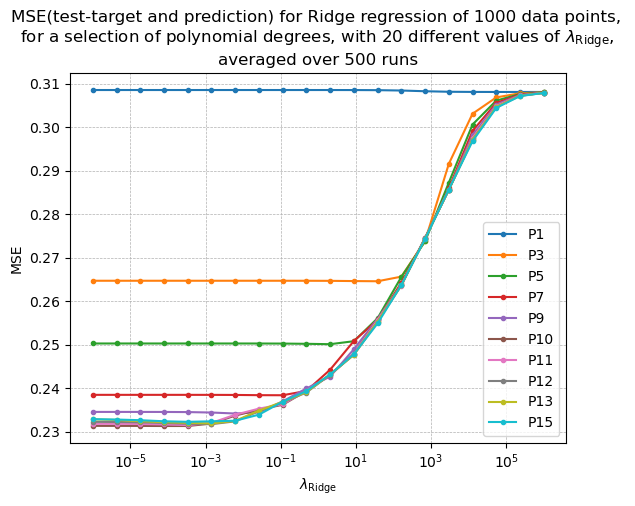

In [8]:
for deg in np.array([0,2,4,6,8,9,10,11,12,14]):#range(len(poly_degrees)):
    plt.semilogx(ridge_lambdas, mean_mse_polys_lambdas[deg,:], ".-", label=f"P{poly_degrees[deg]}")
plt.legend()
plt.xlabel(r"$\lambda_\text{Ridge}$")
plt.ylabel("MSE")
plt.title(
    f"MSE(test-target and prediction) for Ridge regression of {n} data points, \n" 
    f"for a selection of polynomial degrees, with {n_ridge_lambdas} different values of $\\lambda_{{\\text{{Ridge}}}}$, \n"
    f"averaged over {runs} runs"
)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
plt.close()

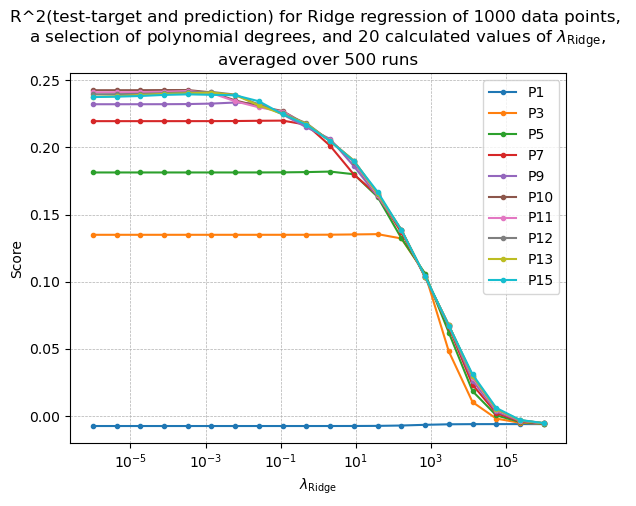

In [9]:
for deg in np.array([0,2,4,6,8,9,10,11,12,14]):#range(len(poly_degrees)):
    plt.semilogx(ridge_lambdas, mean_r2_polys_lambdas[deg,:], ".-", label=f"P{poly_degrees[deg]}")
plt.legend()
plt.xlabel(r"$\lambda_\text{Ridge}$")
plt.ylabel("Score")
plt.title(
    f"R^2(test-target and prediction) for Ridge regression of {n} data points, \n" 
    f"a selection of polynomial degrees, and {n_ridge_lambdas} calculated values of $\\lambda_{{\\text{{Ridge}}}}$, \n"
    f"averaged over {runs} runs"
)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
plt.close()

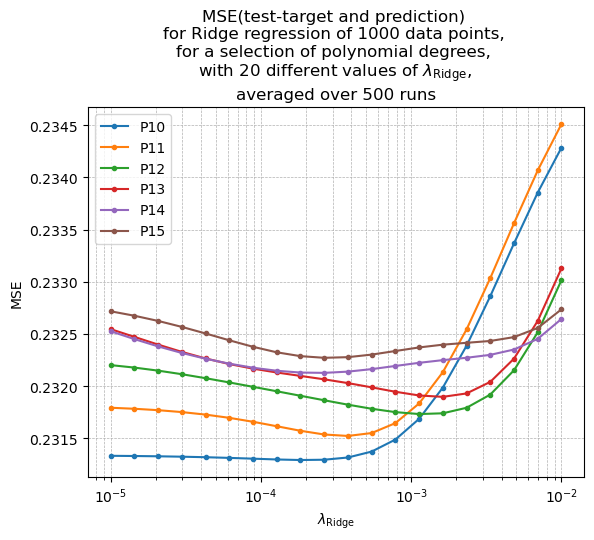

In [16]:
# Circling in on optimal ridge_lambda based on plot above
np.random.seed(2025)

# Number of data points
n = 1000

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 0.5, size=n)

poly_min = 10
poly_max = 15
poly_degrees = np.arange(poly_min, poly_max + 1, 1)

exp_start = -5
exp_stop = -2
n_ridge_lambdas = 20
ridge_lambdas = np.logspace(exp_start, exp_stop, n_ridge_lambdas)

runs = 500

mse_matrix_run_poly_lambda = np.zeros([runs, len(poly_degrees), len(ridge_lambdas)])
r2_matrix_run_poly_lambda = np.zeros([runs, len(poly_degrees), len(ridge_lambdas)])

for i in range(runs):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    for j in range(len(poly_degrees)):
        X_train_poly = polynomial_features(x_train, poly_degrees[j], intercept=False)
        X_test_poly = polynomial_features(x_test, poly_degrees[j], intercept=False)

        # Scaling of the data
        scaler = StandardScaler()   # initialize scaler method
        scaler.fit(X_train_poly)    # only base the scaling on X_train, to prevent data leakage from X_test 
        X_train_s = scaler.transform(X_train_poly)
        X_test_s = scaler.transform(X_test_poly)
        y_offset = np.mean(y_train) # Nesecarry to add this to the y prediction since we have not used intercept parameter

        for k in range(len(ridge_lambdas)):
            # Train model/find beta parameters
            beta = Ridge_parameters(X_train_s, y_train, ridge_lambda=ridge_lambdas[k])
            # Doing the prediction
            predict_y_test_poly = X_test_s @ beta + y_offset # add y_offset since no intercept feature
            
            mse_matrix_run_poly_lambda[i,j,k] = mean_squared_error(y_test, predict_y_test_poly)
            r2_matrix_run_poly_lambda[i,j,k] = 1.0 - (np.sum((y_test - predict_y_test_poly)**2)/(np.sum((y_test - np.mean(y_test))**2)))

mean_mse_polys_lambdas = np.mean(mse_matrix_run_poly_lambda, axis=0)
mean_r2_polys_lambdas = np.mean(r2_matrix_run_poly_lambda, axis=0)
for deg in range(len(poly_degrees)):
    plt.semilogx(ridge_lambdas, mean_mse_polys_lambdas[deg,:], ".-", label=f"P{poly_degrees[deg]}")
plt.legend()
plt.xlabel(r"$\lambda_\text{Ridge}$")
plt.ylabel("MSE")
plt.title(
    f"MSE(test-target and prediction) \n"
    f"for Ridge regression of {n} data points, \n" 
    f"for a selection of polynomial degrees, \n"
    f"with {n_ridge_lambdas} different values of $\\lambda_{{\\text{{Ridge}}}}$, \n"
    f"averaged over {runs} runs"
)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
plt.close()

In [119]:
index_min = np.argmin(mean_mse_polys_lambdas[-1,:])
ridge_lambda_minimize_P10 = ridge_lambdas[index_min]
print(ridge_lambda_minimize_P10)
# Manually round off to three significant digits
ridge_lambda_minimize_P10 = 0.000886 # for standard deviation 1.0
ridge_lambda_minimize_P10 = 0.000264 # for standard deviation 0.5

0.00026366508987303583


### Part c: Writing your own gradient descent code

Replace now the analytical expressions for the optimal parameters
$\boldsymbol{\theta}$ with your own gradient descent code. In this exercise we
focus only on the simplest gradient descent approach with a fixed
learning rate (see the exercises from week 37 and the lecture notes
from week 36).

Study and compare your results from parts a) and b) with your gradient
descent approch. Discuss in particular the role of the learning rate.


In [120]:
def grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda):
    """ 
    Calculate the gradient of the cost function C for Ridge. Original expression: (2.0/n)*(X.T @ X @ theta - X.T @ y) + 2*ridge_lambda*theta.
    Take the matrix multiplication involving features X.T@X, and X.T@y; target vector y; the parameter vector theta; n data point; and ridge_lambda. 
    Usually used in a grad decent/accent loop, therefore having X.T@X and X.T@y precalculated for speed improvement. 
    Return the calculated gradient. 
    """
    theta = theta.reshape(-1,1)
    return (2.0/n)*(XTX @ theta - XTy) + 2*ridge_lambda*theta

def simple_gradient_decent_Ridge(X, y, theta_start, ridge_lambda=0.01, eta=0.01, precision=1e-8, num_iter=10000):
    """
    Find the theta that minimize the Ridge cost function iteratively. Run till precision requirement is met.
    Take feature matrix X, target vector y, parameter vector theta, n data points, ridge_lambda, learning rate eta, 
    precision of grad==0, and number of iterations num_iter.
    Return updated parameter vector theta, and number of iterations used i.
    """
    y = y.reshape(-1,1)
    theta = theta_start.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    XTX = X.T @ X
    XTy = X.T @ y
    n = X.shape[0]
    i = 0
    grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        theta -= eta*grad
        grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
        if i > num_iter:
            break
        i += 1
    return theta, i

MSE prediction analytic: 0.22014789702730725
MSE prediction gradient decent: 0.2244911881582928


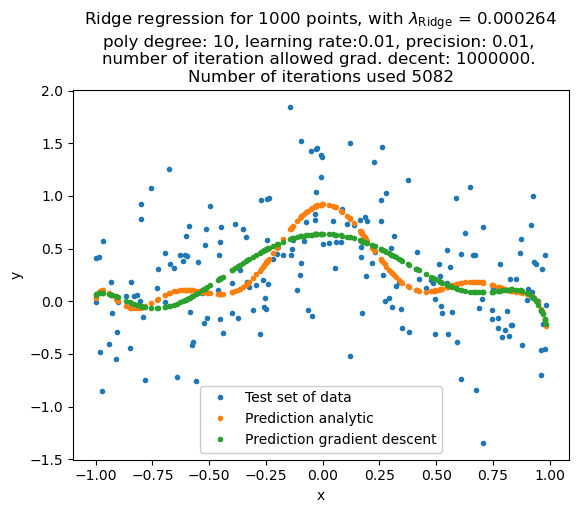

In [121]:
# Simple gradient decent Ridge compared to analytic ridge for a specific set of parameters

np.random.seed(2025)

# Number of data points
n = 1000
# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 0.5, size=n)

poly_deg = 10
ridge_lambda = ridge_lambda_minimize_P10

X = polynomial_features(x, poly_deg, intercept=False)

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y, np.arange(len(x)), test_size=0.2) # Tracks indices of x value in X_train and X_Test, for plotting later

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X_train)    # only base the scaling on X_train, to prevent data leakage from X_test 
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train) # Nesecarry to add this to the y prediction since we have not used intercept parameter

# theta parameters from closed form analytic solution
theta_analytic = Ridge_parameters(X_train_s, y_train, ridge_lambda=ridge_lambda)
prediction_testdata_analytic_theta = X_test_s @ theta_analytic + y_offset

# theta parameters from gradient decent method
learning_rate = 0.01
precision = 0.01
num_iterations = 1000000
theta_start = np.ones([np.shape(X)[1]])

theta_grad_decent, iterations = simple_gradient_decent_Ridge(X_train_s, y_train, theta_start, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
prediction_testdata_gradient_decent_theta = X_test_s @ theta_grad_decent + y_offset

mse_ytest_prediction_analytic = mean_squared_error(y_test, prediction_testdata_analytic_theta)
mse_ytest_prediction_grad_decent = mean_squared_error(y_test, prediction_testdata_gradient_decent_theta)
print(f"MSE prediction analytic: {mse_ytest_prediction_analytic}")
print(f"MSE prediction gradient decent: {mse_ytest_prediction_grad_decent}")

plt.plot(x[test_idx], y[test_idx], ".", label="Test set of data")
plt.plot(x[test_idx], prediction_testdata_analytic_theta, ".", label="Prediction analytic")
plt.plot(x[test_idx], prediction_testdata_gradient_decent_theta, ".", label="Prediction gradient descent")

plt.title(f"Ridge regression for {n} points, with $\lambda_\\text{{Ridge}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed grad. decent: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.xlabel("x")
plt.ylabel("y")
plt.legend().get_frame().set_alpha(1.0)
plt.show()
plt.close()

In some cases even even low precision and learning rate can beat the analytical solution due to an early stopping of the gradient loop can prevent over fitting, for instance being trapped in a local minimum of the cost function.

In [143]:
abs(mse_ytest_prediction_analytic-mse_ytest_prediction_grad_decent)/(mse_ytest_prediction_analytic+mse_ytest_prediction_grad_decent)/ridge_lambda_minimize_P10

37.00048172277739

Should run a loop with 100 runs, or do bootstrap.

### Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.


### Momentum:

In [13]:
def momentum_Ridge(X, y, theta, n, ridge_lambda=0.01, eta=0.01, momentum=0.01, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    XTX = X.T @ X
    XTy = X.T @ y
    i = 0
    theta_old = theta
    change = theta
    grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        theta_old = theta
        # update theta
        theta -= eta*grad + momentum * change
        # update change for next round of momentum
        change = theta - theta_old
        grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
        i += 1
        if i > num_iter:
            break
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/2861614479.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge GD with momentum fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/2861614479.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge GD with momentum fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.48831849]
 [-1.20206534]
 [ 0.39351316]
 [ 0.97870169]
 [ 0.29549038]
 [ 0.78180163]
 [-0.04189928]
 [ 0.01924478]
 [-0.38612249]
 [-0.89055351]] 7241


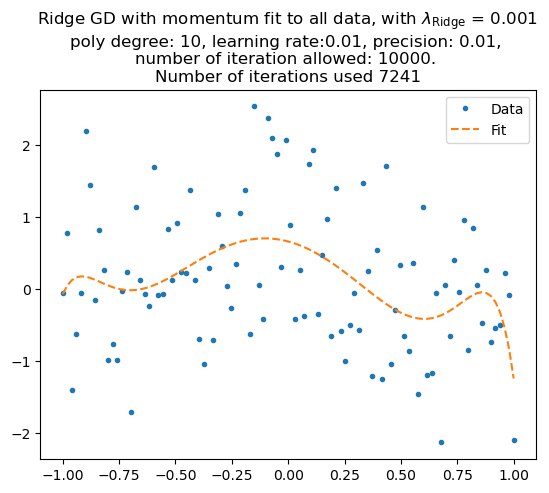

In [22]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 10

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

learning_rate = 0.01
precision = 0.01
num_iterations = 10000


theta, iterations = momentum_Ridge(X, y, theta_start, n, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge GD with momentum fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### AdaGrad

In [81]:
def adagrad_Ridge(X, y, theta, n, ridge_lambda=0.01, eta=0.01, delta_const=1e-7, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    XTX = X.T @ X
    XTy = X.T @ y
    i = 0
    # accumulative sum of gradient element-wise squared
    grad_accum = np.zeros_like(theta)
    grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        # update theta
        grad_accum += np.square(grad)
        theta -= (eta / ( delta_const + np.sqrt(grad_accum)) ) * grad
        # update change for next round of momentum
        grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
        i += 1
        if i > num_iter:
            break
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/3219476885.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/3219476885.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.04274227]
 [-0.05974164]
 [-0.01344706]
 [-0.0239922 ]
 [-0.00715457]
 [-0.01274069]
 [-0.00715325]
 [-0.01014548]
 [-0.00904097]
 [-0.01128818]] 10001


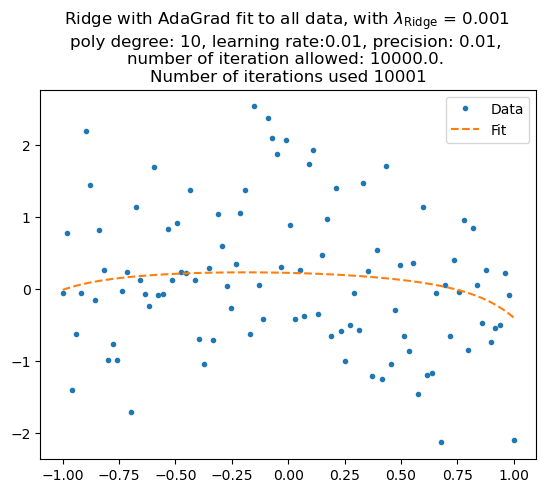

In [82]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 10

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

learning_rate = 0.01
precision = 0.01
num_iterations = 1e4


theta, iterations = adagrad_Ridge(X, y, theta_start, n, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### RMSProp

In [83]:
def rmsprop_Ridge(X, y, theta, n, ridge_lambda=0.01, eta=0.01, decay_rate = 0.999, delta_const=1e-6, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    XTX = X.T @ X
    XTy = X.T @ y
    i = 0
    # decaying average of gradient element-wise squared
    grad_accum = np.zeros_like(theta)
    grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        grad_accum = decay_rate * grad_accum + (1-decay_rate)*np.square(grad)
        # update theta
        theta -= (eta / ( delta_const + np.sqrt(grad_accum)) ) * grad
        # update change for next round of momentum
        grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
        i += 1
        if i > num_iter:
            break
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/1310506929.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/1310506929.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.48976177]
 [-1.20048305]
 [ 0.39550219]
 [ 0.97434585]
 [ 0.29429936]
 [ 0.78041963]
 [-0.03678951]
 [ 0.02978969]
 [-0.39087401]
 [-0.89697412]] 1944


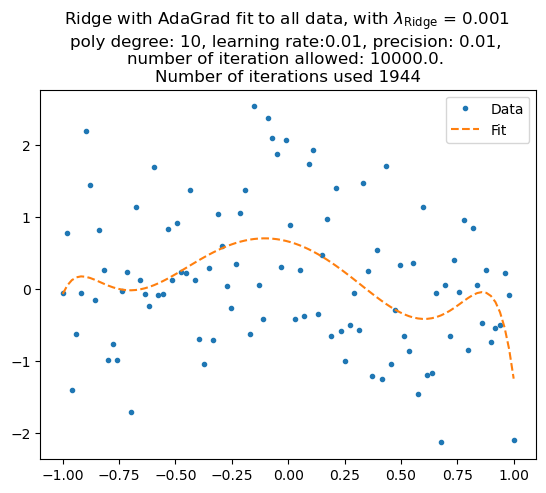

In [84]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 10

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

learning_rate = 0.01
precision = 0.01
num_iterations = 1e4


theta, iterations = rmsprop_Ridge(X, y, theta_start, n, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with RMSProp fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Adam

In [85]:
def adam_Ridge(X, y, theta, n, ridge_lambda=0.01, eta=0.01, decay1 = 0.9, decay2 = 0.999, delta=1e-8, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    XTX = X.T @ X
    XTy = X.T @ y
    i = 0
    # decaying average of gradient element-wise squared
    first_moment = np.zeros_like(theta)
    second_moment = np.zeros_like(theta)
    grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        i += 1
        first_moment = decay1 * first_moment + (1-decay1)*grad
        second_moment = decay2 * second_moment + (1-decay2)*np.square(grad)
        corrected_first = first_moment / (1 - decay1**i)
        corrected_second = second_moment / (1 - decay2**i)
        theta -= eta * corrected_first / (np.sqrt(corrected_second) + delta)
        # update change for next round of momentum
        grad = grad_C_Ridge(XTX, XTy, theta, n, ridge_lambda)
        if i > num_iter:
            break
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/449960867.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with Adam fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/449960867.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with Adam fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.4899484 ]
 [-1.20056867]
 [ 0.39587175]
 [ 0.97471887]
 [ 0.29422974]
 [ 0.78001588]
 [-0.0368635 ]
 [ 0.02958369]
 [-0.39093751]
 [-0.89664853]] 4309


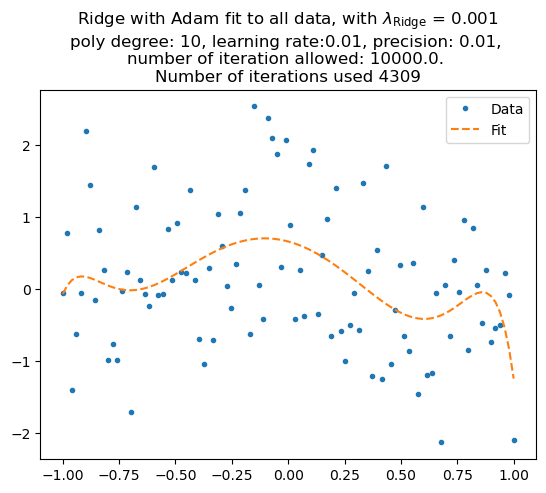

In [86]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 10

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

learning_rate = 0.01
precision = 0.01
num_iterations = 1e4


theta, iterations = adam_Ridge(X, y, theta_start, n, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with Adam fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Part e: Writing our own code for Lasso regression

LASSO regression (see lecture slides from week 36 and week 37)
represents our first encounter with a machine learning method which
cannot be solved through analytical expressions (as in OLS and Ridge regression). Use the gradient
descent methods you developed in parts c) and d) to solve the LASSO
optimization problem. You can compare your results with
the functionalities of **Scikit-Learn**.

Discuss (critically) your results for the Runge function from OLS,
Ridge and LASSO regression using the various gradient descent
approaches.


### Part f: Stochastic gradient descent

Our last gradient step is to include stochastic gradient descent using
the same methods to update the learning rates as in parts c-e).
Compare and discuss your results with and without stochastic gradient
and give a critical assessment of the various methods.


In [252]:
def mini_batch(X, y, batch_size):
    num_points, num_features = np.shape(X)
    batch_indices = np.random.randint(low=num_points, size=batch_size)
    X_batch = np.zeros((batch_size, num_features))
    y_batch = np.zeros((batch_size,))
    for i, batch_i in enumerate(batch_indices):
        X_batch[i] = X[batch_i]
        y_batch[i] = y[batch_i,0]
    return X_batch, y_batch

def grad_C_Ridge_XY(X, y, theta, n, ridge_lambda):
    """ 
    Calculate the gradient of the cost function C for Ridge. Original expression: (2.0/n)*(X.T @ X @ theta - X.T @ y) + 2*ridge_lambda*theta.
    Take the matrix multiplication involving features X.T@X, and X.T@y; target vector y; the parameter vector theta; n data point; and ridge_lambda. 
    Usually used in a grad decent/accent loop, therefore having X.T@X and X.T@y precalculated for speed improvement. 
    Return the calculated gradient. 
    """
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    return (2.0/n)*(X.T @ X @ theta - X.T@y) + 2*ridge_lambda*theta

### Stochastic Gradient Descent

In [257]:
def stochastic_gd_Ridge(X, y, theta, n, mbatch_size, ridge_lambda=0.01, eta=0.01, precision=1e-8, num_iter=10000):
    """
    Find the theta that minimize the Ridge cost function iteratively. Run till precision requirement epsilon is met.
    Take feature matrix X, target vector y, parameter vector theta, n data points, ridge_lambda, learning rate eta, 
    precision of grad==0, and number of iterations num_iter.
    Return updated parameter vector theta, and number of iterations used i.
    """
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    i = 0
    Xmb, ymb = mini_batch(X,y, mbatch_size)
    grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        theta -= eta*grad
        i += 1
        if i > num_iter:
            break
        Xmb, ymb = mini_batch(X,y, mbatch_size)
        grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/3887698815.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with Stochastic GD fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/3887698815.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with Stochastic GD fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.15182404]
 [-0.26412812]] 5065


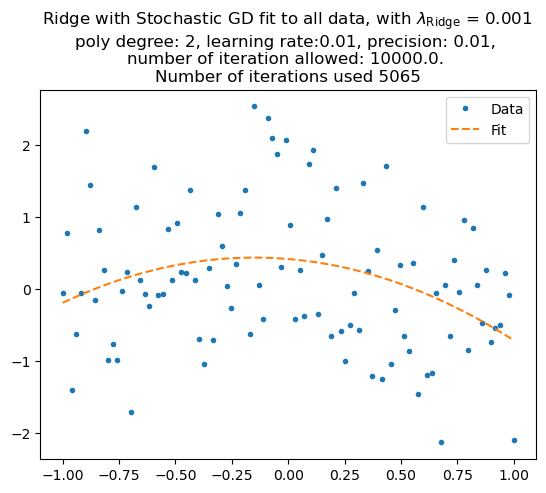

In [286]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0,1, size=n)

poly_deg = 2

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

mbatch_size = 20
learning_rate = 0.01
precision = 0.01
num_iterations = 1e4

theta, iterations = stochastic_gd_Ridge(X, y, theta_start, n, mbatch_size, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with Stochastic GD fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Stochastic Momentum

In [282]:
def stochastic_momentum_Ridge(X, y, theta, n, mbatch_size, ridge_lambda=0.01, eta=0.01, momentum=0.01, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    i = 0
    theta_old = theta
    change = theta
    Xmb, ymb = mini_batch(X,y, mbatch_size)
    grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        theta_old = theta
        # update theta
        theta -= eta*grad + momentum * change
        # update change for next round of momentum
        change = theta - theta_old
        i += 1
        if i > num_iter:
            break
        Xmb, ymb = mini_batch(X,y, mbatch_size)
        grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    return theta, i

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/580691660.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with Stochastic momentum fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/580691660.py:34: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with Stochastic momentum fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.15182404]
 [-0.26412812]] 5065


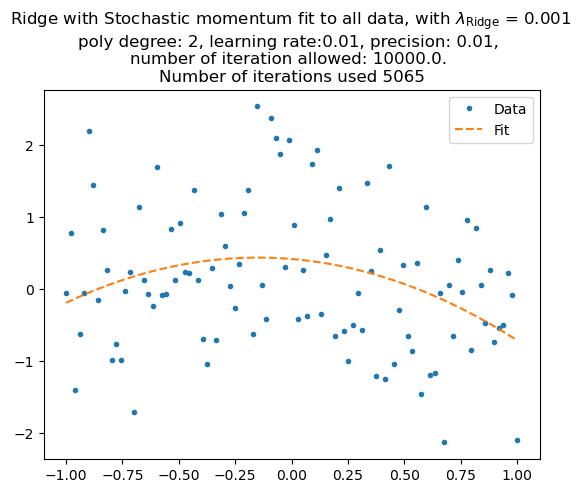

In [283]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 2
X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

mbatch_size = 20
learning_rate = 0.01
precision = 0.01
num_iterations = 1e4

theta, iterations = stochastic_momentum_Ridge(X, y, theta_start, n, mbatch_size, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with Stochastic momentum fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Stochastic AdaGrad

In [211]:
def stochastic_adagrad_Ridge(X, y, theta, n, mbatch_size, ridge_lambda=0.01, eta=0.01, delta_const=1e-7, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    i = 0
    # accumulative sum of gradient element-wise squared
    grad_accum = np.zeros_like(theta)
    Xmb, ymb = mini_batch(X, y, mbatch_size)
    grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        # update theta
        grad_accum += np.square(grad)
        theta -= (eta / ( delta_const + np.sqrt(grad_accum)) ) * grad
        # update change for next round of momentum
        i += 1
        if i > num_iter:
            break
        Xmb, ymb = mini_batch(X, y, mbatch_size)
        grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/3078792607.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with Stochastic AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/3078792607.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with Stochastic AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[0.0718929 ]
 [0.06495404]] 4346


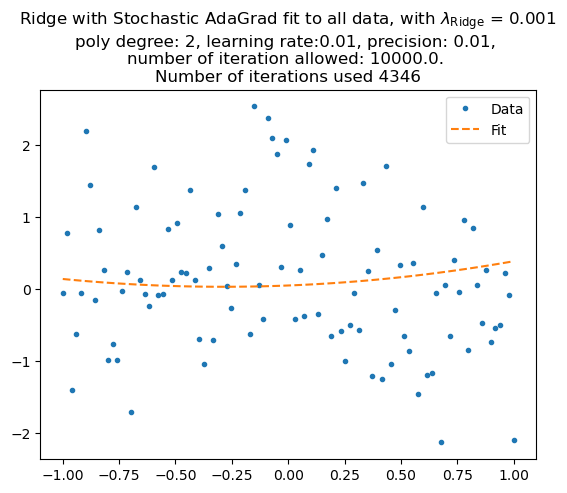

In [270]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 2

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

mbatch_size = 20
learning_rate = 0.01
precision = 0.01
num_iterations = 1e4

theta, iterations = stochastic_adagrad_Ridge(X, y, theta_start, n, mbatch_size, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with Stochastic AdaGrad fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Stochastic RMSProp

In [287]:
def stochastic_rmsprop_Ridge(X, y, theta, n, mbatch_size, ridge_lambda=0.01, eta=0.01, decay_rate = 0.999, delta_const=1e-6, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    i = 0
    # decaying average of gradient element-wise squared
    grad_accum = np.zeros_like(theta)
    Xmb, ymb = mini_batch(X, y, mbatch_size)
    grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        grad_accum = decay_rate * grad_accum + (1-decay_rate)*np.square(grad)
        # update theta
        theta -= (eta / ( delta_const + np.sqrt(grad_accum)) ) * grad
        i += 1
        if i > num_iter:
            break
        Xmb, ymb = mini_batch(X, y, mbatch_size)
        grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/4224889714.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with Stochastic RMSProp fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/4224889714.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with Stochastic RMSProp fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.20547858]
 [-0.19350225]] 29


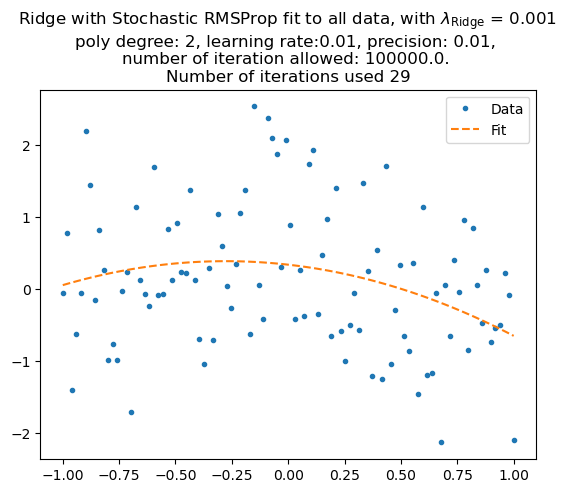

In [288]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 2

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

mbatch_size = 20
learning_rate = 0.01
precision = 0.01
num_iterations = 10e4

theta, iterations = stochastic_rmsprop_Ridge(X, y, theta_start, n, mbatch_size, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with Stochastic RMSProp fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Stochastic Adam

In [289]:
def stochastic_adam_Ridge(X, y, theta, n, mbatch_size, ridge_lambda=0.01, eta=0.01, decay1 = 0.9, decay2 = 0.999, delta=1e-8, precision=1e-8, num_iter=10000):
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    if np.shape(X)[0] != np.shape(y)[0]:
        raise ValueError("X and y is not of right shape")
    i = 0
    # decaying average of gradient element-wise squared
    first_moment = np.zeros_like(theta)
    second_moment = np.zeros_like(theta)
    Xmb, ymb = mini_batch(X, y, mbatch_size)
    grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    while np.linalg.norm(grad) > precision:
        i += 1
        first_moment = decay1 * first_moment + (1-decay1)*grad
        second_moment = decay2 * second_moment + (1-decay2)*np.square(grad)
        corrected_first = first_moment / (1 - decay1**i)
        corrected_second = second_moment / (1 - decay2**i)
        theta -= eta * corrected_first / (np.sqrt(corrected_second) + delta)
        # update change for next round of momentum
        if i > num_iter:
            break
        Xmb, ymb = mini_batch(X,y, mbatch_size)
        grad = grad_C_Ridge_XY(Xmb, ymb, theta, mbatch_size, ridge_lambda)
    return theta, i

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_21191/2050744073.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Ridge with Stochastic Adam fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
/tmp/ipykernel_21191/2050744073.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Ridge with Stochastic Adam fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"


[[-0.21385112]
 [-0.25740176]] 2181


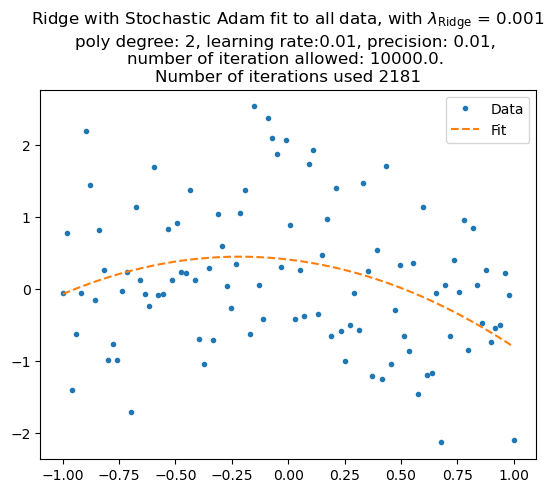

In [291]:
# Simple gradient decent Ridge for very specified case
np.random.seed(2025)

# Number of data points
n = 100

# Setting up data
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 1, size=n)

poly_deg = 2

X = polynomial_features(x, poly_deg, intercept=False)
theta_start = np.ones([np.shape(X)[1]])

# Scaling of the data
scaler = StandardScaler()   # initialize scaler method
scaler.fit(X)    # only base the scaling on X_train, to prevent data leakage from X_test 
X = scaler.transform(X)
y_offset = np.mean(y) # Nesecarry to add this to the y prediction since we have not used intercept parameter

ridge_lambda = 0.001

mbatch_size = 20
learning_rate = 0.01
precision = 0.01
num_iterations = 1e4

theta, iterations = stochastic_adam_Ridge(X, y, theta_start, n, mbatch_size, ridge_lambda=ridge_lambda, eta=learning_rate, precision=precision, num_iter=num_iterations)
fit = X @ theta + y_offset

print(theta, iterations)
plt.plot(x, y, ".", label="Data")
plt.plot(x, fit, "--", label="Fit")
plt.title(f"Ridge with Stochastic Adam fit to all data, with $\lambda_{{\mathrm{{Ridge}}}}$ = {ridge_lambda} \n"
          f"poly degree: {poly_deg}, learning rate:{learning_rate}, precision: {precision}, \n"
          f"number of iteration allowed: {num_iterations}. \n"
          f"Number of iterations used {iterations}"
         )
plt.legend()
plt.show()
plt.close()

### Part g: Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing
the **bootstrap** resampling technique. **We will only use the simpler
ordinary least squares here**.

With a code which does OLS and includes resampling techniques,
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms.

Before you perform an analysis of the bias-variance trade-off on your
test data, make first a figure similar to Fig. 2.11 of Hastie,
Tibshirani, and Friedman. Figure 2.11 of this reference displays only
the test and training MSEs. The test MSE can be used to indicate
possible regions of low/high bias and variance. You will most likely
not get an equally smooth curve! You may also need to increase the
polynomial order and play around with the number of data points as
well (see also the exercise set from week 35).

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model


$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$


Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\theta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\theta}$.

The parameters $\boldsymbol{\theta}$ are in turn found by optimizing the mean
squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\theta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$


Here the expected value $\mathbb{E}$ is the sample value.

Show that you can rewrite this in terms of a term which contains the
variance of the model itself (the so-called variance term), a term
which measures the deviation from the true data and the mean value of
the model (the bias term) and finally the variance of the noise.

That is, show that


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with (we approximate $f(\boldsymbol{x})\approx \boldsymbol{y}$)


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$


**Important note**: Since the function $f(x)$ is unknown, in order to be able to evalute the bias, we replace $f(\boldsymbol{x})$ in the expression for the bias with $\boldsymbol{y}$.

The answer to this exercise should be included in the theory part of
the report. This exercise is also part of the weekly exercises of
week 38. Explain what the terms mean and discuss their
interpretations.

Perform then a bias-variance analysis of the Runge function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.


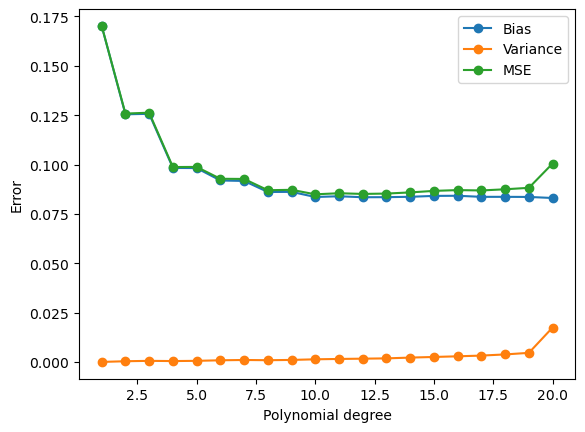

In [153]:
# Bias-variance-tradeoff 

# Setting up dataset
np.random.seed(2025)
n = 1000
x = np.linspace(-1, 1, n)
y = Runge_func(x) + np.random.normal(0, 0.1, size=n)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

bootstraps = 1000

max_degree = 20
poly_degrees = np.arange(1, max_degree + 1, 1)

biases = np.zeros(max_degree)
variances = np.zeros(max_degree)
MSEs = np.zeros(max_degree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(len(poly_degrees)):
    X_train = polynomial_features(x_train, poly_degrees[degree], intercept=True)
    X_test = polynomial_features(x_test, poly_degrees[degree], intercept=True)

    # Scaling of the data
    scaler = StandardScaler()   # initialize scaler method
    scaler.fit(X_train)               # only base the scaling on X_train, to prevent data leakage from X_test 
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    # predictions are later filled with predictions made from X_test (feature matrix), constructed from x_test, 
    # so got to have same length
    predictions = np.zeros([bootstraps, len(x_test)])

    for b in range(bootstraps):
        # For each bootstrap sample of X_train and Y_train, we train model, predict on X_test
        # Later comparing against the un-touched y_test
        #
        X_train_resampled, y_train_resampled = resample(X_train_s, y_train)

        # Training the model on training data
        beta = OLS_parameters(X_train_resampled, y_train_resampled)
        # Making the prediction on test data
        pred = X_test_s @ beta
        predictions[b,:] = pred.ravel()

    # We take the true values or target, as the un-tough values in the y_test split
    # The predicted y values, lives in the predictions matrix, where each row is a sample of values,
    # and each column corresponding to a one y point across bootstrap samples 
    biases[degree] = np.mean((y_test.T - np.mean(predictions, axis=0))**2)

    # Var(prediction) is the mean of the flatend matrix, over all samples
    variances[degree] = np.mean((predictions - np.mean(predictions, axis=0))**2)

    # For the MSE, we take difference of each y point per bootstrap sample, making y_test a row vector
    # then squaring, before taking the mean over the flattened matrix
    
    MSEs[degree] = np.mean(np.mean((predictions - y_test.T)**2, axis=1), axis=0)

plt.plot(poly_degrees, biases, 'o-', label="Bias")
plt.plot(poly_degrees, variances, 'o-', label="Variance")
plt.plot(poly_degrees, MSEs, 'o-', label="MSE")
#plt.title(f"Bias-variance tradeoff, for {n} data points and {bootstraps} bootstraps")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend()
plt.savefig("bias_var_tradeoff.pdf", bbox_inches="tight")
plt.show()
plt.close()

### Part h): Cross-validation as resampling techniques, adding more complexity

The aim here is to implement another widely popular
resampling technique, the so-called cross-validation method.

Implement the $k$-fold cross-validation algorithm (feel free to use
the functionality of **Scikit-Learn** or write your own code) and
evaluate again the MSE function resulting from the test folds.

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code from the previous exercise. Comment and interpret your results.

In addition to using the ordinary least squares method, you should
include both Ridge and Lasso regression in the final analysis.


In [ ]:
# Cross validation from Scikit-Learn



## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis of parts g) and h).


## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers.

- Give a short description of the nature of the problem and the eventual numerical methods you have used.

- Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

- Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

- If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

- Include your results either in figure form or in a table. Remember to label your results. All tables and figures should have relevant captions and labels on the axes.

- Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

- Try to give an interpretation of you results in your answers to the problems.

- Critique: if possible include your comments and reflections about the exercise, whether you felt you learnt something, ideas for improvements and other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

- Try to establish a practice where you log your work at the computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember what a previous test version of your program did. Here you could also record the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.


## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file. As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

- Use Canvas to hand in your projects, log in at <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

- Upload **only** the report file or the link to your GitHub/GitLab or similar typo of repos! For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar domain. The report file should include all of your discussions and a list of the codes you have developed. Do not include library files which are available at the course homepage, unless you have made specific changes to them.

- In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally,
we encourage you to collaborate. Optimal working groups consist of
2-3 students. You can then hand in a common report.


## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages,
we recommend that you install the following Python packages via **pip** as

1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**.

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows
for a seamless installation of additional software via for example

1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as

1. sudo apt-get install python3 (or python for python2.7)

etc etc.

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up all relevant dependencies for Python, namely

1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/) is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

- [Scikit-learn](http://scikit-learn.org/stable/),

- [Tensorflow](https://www.tensorflow.org/),

- [PyTorch](http://pytorch.org/) and

- [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.
